<a href="https://colab.research.google.com/github/rootDevOps/coderhouse_data_science/blob/main/Copia_de_K_Means_Practica_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Practica

In [22]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

import pandas as pd

from sklearn.cluster import KMeans


### 1) Traer la data del archivo 'Mall_Customers.csv' y guardala en un DataFrame, luego mostrar las ultimas 8 filas

In [23]:
# Montando el drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
%cd Colab Notebooks/
%ls

[Errno 2] No such file or directory: 'Colab Notebooks/'
/content/drive/MyDrive/Colab Notebooks
'Copia de 04.14-Visualization-With-Seaborn.ipynb'
'Copia de Clase 30 - Limpieza de datos.ipynb'
'Copia de Data_adcquisition (1).ipynb'
'Copia de Data_adcquisition.ipynb'
'Copia de Exploratory_Data_Analysis_(EDA).ipynb'
'Copia de K_Means_Practica_.ipynb'
'Copia de Regresion_Lineal (1).ipynb'
'Copia de Regresion_Lineal.ipynb'
'Copia de Regresion_Lineal_Supuestos.ipynb'
'Copy of VisualizacionesI.ipynb'
 Mall_Customers.csv


In [25]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 2) Crear la variable X con las ultimas dos columnas unicamente

In [32]:
X = dataset.iloc[:, [3, 4]].values

### 3) Utilizar el metodo del codo de Jambú y elejir la cantidad optima de clusters (justificar la eleccion)

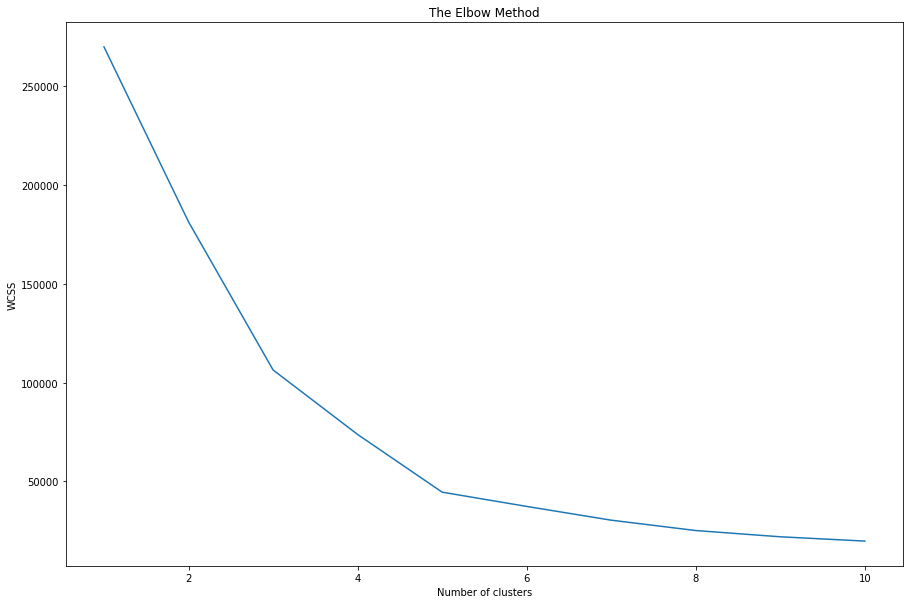

In [30]:
# Metodo del Codo para encontrar el numero optimo de clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Link de Interés: https://es.wikipedia.org/wiki/K-medias

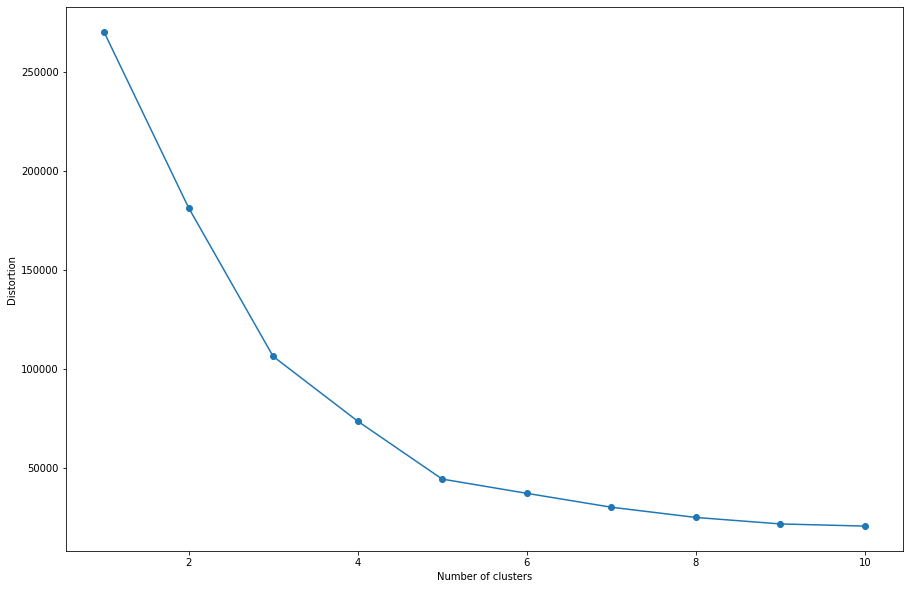

### 4) Crear el modelo con la cantidad de clusters adecuada

In [35]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) #k-means++ acelera la convergencia, respecto de random

### 5) Entrenar el modelo, guardar el resultado en una variable 

In [36]:
y_kmeans = kmeans.fit_predict(X)

### 6) Realizar un grafico con los datos usando las predicciones para separar por colores los clusters

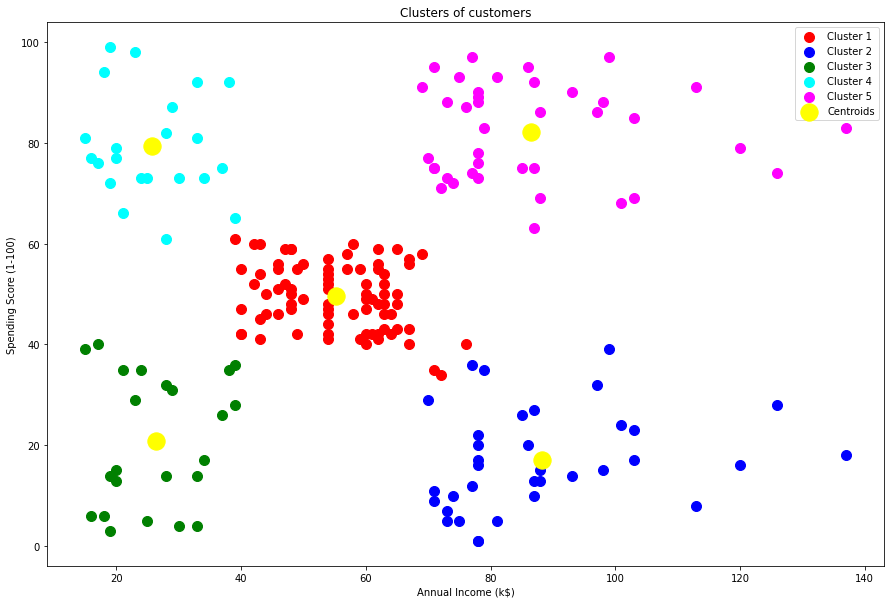

In [37]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### 7) Implementación de HDBSCAN

In [40]:
import seaborn as sns

In [41]:
!python -m pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 4.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [42]:
!pip install -U hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 33.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2343417 sha256=938ff8e86510471b42c541e20b77f28f742080f02f507cc1a366e6667b37bdcc
  Stored in directory: /root/.cache/pip/wheels/2b/6e/99/5351753a6acbbd3a612654eb23099ffdac9137931f6adf9c12
Successfully built hdbscan


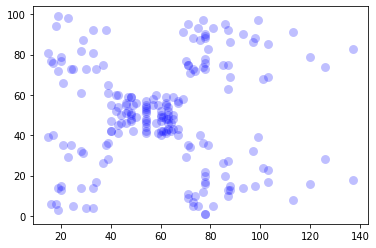

In [58]:
%matplotlib inline
plot_kwds = { 'alpha': 0.25, 's': 80, 'linewidths': 0}
plt.scatter(X[:,0], X[:,1], c='b', **plot_kwds)

In [49]:
# Llamando hdbscan
import hdbscan
#Generando un objeto de clustering
clusterer = hdbscan.HDBSCAN()

#Aplico el cluster a mis datos
clusterer.fit(X)


HDBSCAN()

In [50]:
hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40,
    metric='euclidean', min_cluster_size=5, min_samples=None, p=None)

HDBSCAN()

In [51]:
clusterer.labels_

array([-1,  3,  1,  3, -1,  3,  1, -1,  1,  3,  1, -1,  1,  3,  1,  3,  4,
       -1, -1, -1,  4,  3,  1,  3,  1,  3, -1, -1,  4, -1,  1,  3, -1, -1,
        1,  3, -1,  3, -1, -1,  4, -1,  4,  4, -1,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  0, -1,  0,  4,  0,  2,  0,  2,  0,  4,  0,  2,  0,
        2,  0,  2,  0,  2,  0,  4,  0,  2,  0,  4,  0,  2,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0, -1, -1,
        2,  0,  2,  0,  2,  0,  2,  0,  2,  0, -1,  0,  2,  0, -1,  0, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [52]:
pd.crosstab(clusterer.labels_, columns='count')

col_0,count
row_0,
-1,35
0,32
1,10
2,23
3,13
4,87


In [53]:
clusterer.probabilities_

array([0.        , 0.71795816, 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.82321683, 1.        ,
       1.        , 0.        , 0.91943506, 1.        , 1.        ,
       1.        , 0.41863795, 0.        , 0.        , 0.        ,
       0.41863795, 0.98058068, 1.        , 0.90535746, 1.        ,
       0.74953169, 0.        , 0.        , 0.41863795, 0.        ,
       0.81983605, 0.82760589, 0.        , 0.        , 0.7520088 ,
       0.82760589, 0.        , 0.74953169, 0.        , 0.        ,
       0.52790958, 0.        , 0.5153882 , 0.51140831, 0.        ,
       0.70710678, 0.68718427, 0.82462113, 0.72886899, 0.72886899,
       0.82462113, 0.72886899, 1.        , 0.80860754, 0.97182532,
       0.70710678, 1.        , 1.        , 1.        , 0.92195445,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.76564149, 1.        , 1.        , 1.     

### 8) Graficar los clústers identificados con HDBSCAN

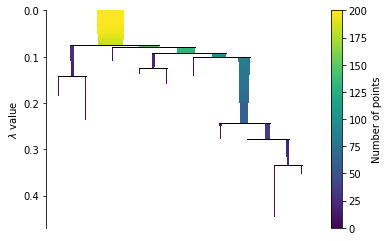

In [54]:
clusterer.condensed_tree_.plot()

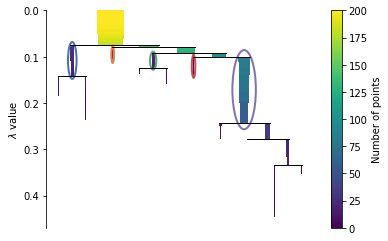

In [55]:
# Le pedimos al algoritmo que me indique cuáles son los clusters
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))

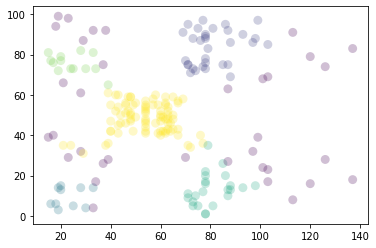

In [57]:
%matplotlib inline
plot_kwds = { 'alpha': 0.25, 's': 80, 'linewidths': 0}
plt.scatter(X[:,0], X[:,1], c=clusterer.labels_, **plot_kwds)